### ### Answer 9
Write a program to read the data from the following link, perform data analysis and answer the following questions
Note -
1.	Write code comments wherever required for code understanding

Link - https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD


Insights to be drawn -

●	Get all the cars and their types that do not qualify for clean alternative fuel vehicle
●	Get all TESLA cars with the model year, and model type made in Bothell City.
●	Get all the cars that have an electric range of more than 100, and were made after 2015
●	Draw plots to show the distribution between city and electric vehicle type

Cars and their types that do not qualify for clean alternative fuel vehicle:
Empty DataFrame
Columns: [Make, Model]
Index: []

TESLA cars with the model year and model type made in Bothell City:
Empty DataFrame
Columns: [Model Year, Model]
Index: []

Cars with an electric range of more than 100 and made after 2015:
          Make    Model  Electric Range  Model Year
0        TESLA  MODEL X             238        2018
2        TESLA  MODEL 3             220        2019
4        TESLA  MODEL S             210        2017
12       TESLA  MODEL 3             308        2020
13       TESLA  MODEL 3             322        2020
...        ...      ...             ...         ...
130417   TESLA  MODEL Y             291        2020
130428  NISSAN     LEAF             151        2018
130432   TESLA  MODEL Y             291        2020
130436   TESLA  MODEL 3             215        2018
130441   TESLA  MODEL X             293        2020

[34066 rows x 4 columns]


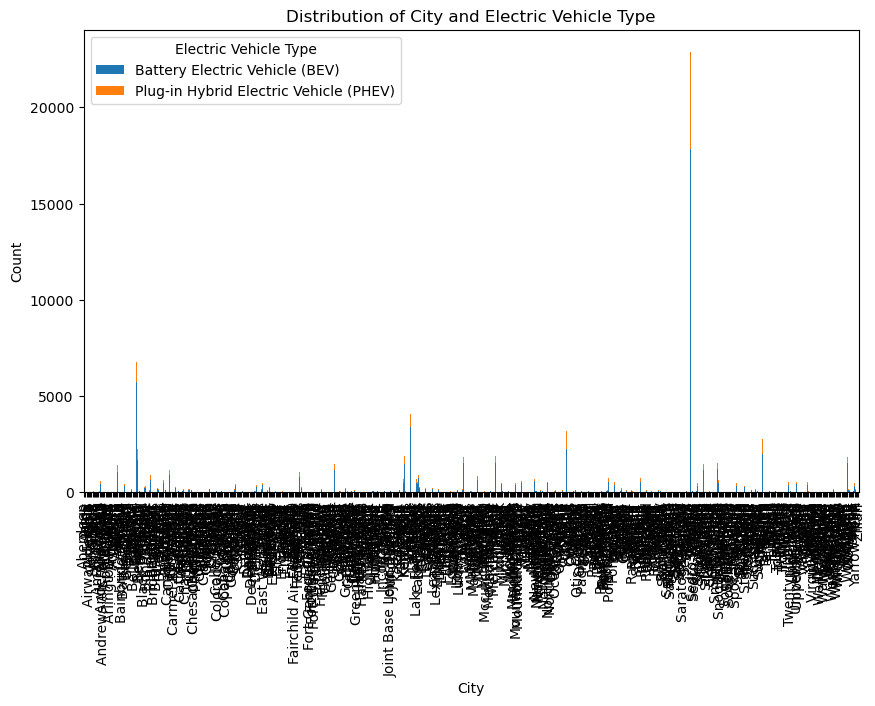

In [5]:
import pandas as pd

# Read the data from the provided link
url = 'https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD'
data = pd.read_csv(url)

# Get all the cars and their types that do not qualify for clean alternative fuel vehicle
non_clean_cars = data[data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'No']
non_clean_cars_info = non_clean_cars[['Make', 'Model']]
print("Cars and their types that do not qualify for clean alternative fuel vehicle:")
print(non_clean_cars_info)

# Get all TESLA cars with the model year, and model type made in Bothell City
tesla_cars = data[(data['Make'] == 'TESLA') & (data['City'] == 'BOTHELL')]
tesla_cars_info = tesla_cars[['Model Year', 'Model']]
print("\nTESLA cars with the model year and model type made in Bothell City:")
print(tesla_cars_info)

# Get all the cars that have an electric range of more than 100 and were made after 2015
electric_cars = data[(data['Electric Range'] > 100) & (data['Model Year'] > 2015)]
electric_cars_info = electric_cars[['Make', 'Model', 'Electric Range', 'Model Year']]
print("\nCars with an electric range of more than 100 and made after 2015:")
print(electric_cars_info)

# Draw plots to show the distribution between city and electric vehicle type
import matplotlib.pyplot as plt

city_electric_type = data.groupby(['City', 'Electric Vehicle Type']).size().unstack()
city_electric_type.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Distribution of City and Electric Vehicle Type")
plt.xlabel("City")
plt.ylabel("Count")
plt.show()
